___
<h1 style="color:blue;">POLYNOMIAL REGRESSION</h1>

___

## Introduction to Polynomial Regression
Polynomial Regression is a type of regression analysis where the relationship between the independent variable \(X\) and the dependent variable \(Y\) is modeled as an \(n\)th degree polynomial. Polynomial regression fits a nonlinear relationship between the value of \(X\) and the corresponding conditional mean of \(Y\).

### Key Concepts
- **Dependent Variable (Y):** The variable we are trying to predict or explain.
- **Independent Variables (X1, X2, ..., Xn):** The variables that are used to predict the dependent variable.
- **Polynomial Coefficients:** The coefficients of the polynomial equation.
- **Degree of Polynomial:** The highest power of the polynomial equation.

### The Polynomial Regression Equation
The equation for Polynomial Regression is:

$$ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + ... + \beta_nX^n + \epsilon $$

where:
- **Y:** Dependent variable
- **X:** Independent variable
- **β0:** Intercept
- **β1, β2, ..., βn:** Coefficients of the polynomial terms
- **ε:** Error term
- **n:** Degree of the polynomial

### Assumptions of Polynomial Regression
- **Linearity in parameters:** The relationship between the predictors and the response is linear in the parameters.
- **Independence:** Observations are independent of each other.
- **Homoscedasticity:** Constant variance of the error terms.
- **Normality:** The error terms are normally distributed.

### Applications
Polynomial Regression is widely used in various fields such as:
- **Economics:** To model economic data and predict economic indicators.
- **Finance:** To predict stock prices, financial trends, etc.
- **Engineering:** To model complex systems and processes.
- **Medicine:** To predict health outcomes based on various predictors.


___
<h1 style="color:blue;">DATASET</h1>

___

### Context
The dataset contains information about real estate prices in Taiwan. It includes data on transaction dates, house ages, distances to the nearest MRT stations, numbers of convenience stores, latitudes, longitudes, and house prices of unit areas. The dataset is downloaded from Kaggle.

### Attribute Information
- **No:** Identification number
- **transaction_date:** Transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age:** Age of the house (years)
- **distance_to_the_nearest_MRT_station:** Distance to the nearest MRT station (meters)
- **number_of_convenience_stores:** Number of convenience stores in the living circle on foot (integer)
- **latitude:** Latitude coordinate of the house (degrees)
- **longitude:** Longitude coordinate of the house (degrees)
- **house_price_of_unit_area:** House price of unit area (3.3 square meters)

### Acknowledgements

- Dataset: UCI Machine Learning Repository
- Data link: [Real Estate Data](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction)


___
# <span style="color:blue;">Data Analysis</span>

___

## Descriptive Analysis
- **Objective:** Summarize and describe the main features of a dataset.
- **Techniques:** Measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and frequency distributions.
- **Usage:** Provides a simple summary about the sample and measures. It helps in understanding the basic features of the data.

In [1]:
# Importing the required libraries
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the data
df = pd.read_csv('Real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
#changing the column names
df.columns = ['No', 'transaction_date', 'house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude', 'house_price_of_unit_area']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction_date                     414 non-null    float64
 2   house_age                            414 non-null    float64
 3   distance_to_the_nearest_MRT_station  414 non-null    float64
 4   number_of_convenience_stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house_price_of_unit_area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [3]:
# Drop the 'No' column as it is not useful for the model
df = df.drop('No', axis=1)
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_date                     414 non-null    float64
 1   house_age                            414 non-null    float64
 2   distance_to_the_nearest_MRT_station  414 non-null    float64
 3   number_of_convenience_stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house_price_of_unit_area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
# Function to convert fractional year to datetime
def fractional_year_to_date(year):
    year_int = int(year)
    rem = year - year_int
    start_of_year = datetime(year_int, 1, 1)
    days_in_year = (datetime(year_int + 1, 1, 1) - start_of_year).days
    return start_of_year + timedelta(days=rem * days_in_year)

# Convert transaction_date to datetime format
df['transaction_date'] = df['transaction_date'].apply(fractional_year_to_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     414 non-null    datetime64[ns]
 1   house_age                            414 non-null    float64       
 2   distance_to_the_nearest_MRT_station  414 non-null    float64       
 3   number_of_convenience_stores         414 non-null    int64         
 4   latitude                             414 non-null    float64       
 5   longitude                            414 non-null    float64       
 6   house_price_of_unit_area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


In [5]:
# Convert other columns to integer format
df['house_age'] = df['house_age'].astype('int64')
df['distance_to_the_nearest_MRT_station'] = df['distance_to_the_nearest_MRT_station'].astype('int64')
df['number_of_convenience_stores'] = df['number_of_convenience_stores'].astype('int64')
df['latitude'] = df['latitude'].astype('float64')  # Keep latitude and longitude as float
df['longitude'] = df['longitude'].astype('float64')
df['house_price_of_unit_area'] = df['house_price_of_unit_area'].astype('int64')

# Display DataFrame info to confirm data types
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_date                     414 non-null    datetime64[ns]
 1   house_age                            414 non-null    int64         
 2   distance_to_the_nearest_MRT_station  414 non-null    int64         
 3   number_of_convenience_stores         414 non-null    int64         
 4   latitude                             414 non-null    float64       
 5   longitude                            414 non-null    float64       
 6   house_price_of_unit_area             414 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 22.8 KB


,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012-12-01 14:55:40.799997,32,84,10,24.98298,121.54024,37
1,2012-12-01 14:55:40.799997,19,306,9,24.98034,121.53951,42
2,2013-08-01 19:04:48.000003,13,561,5,24.98746,121.54391,47
3,2013-07-02 12:00:00.000000,13,561,5,24.98746,121.54391,54
4,2012-10-31 21:04:19.200003,5,390,5,24.97937,121.54245,43


In [6]:
df.shape

(414, 7)

## Exploratory Data Analysis (EDA)
- **Objective:** Explore the data to find patterns, relationships, or anomalies.
- **Techniques:** Data visualization (scatter plots, histograms, box plots), correlation analysis, and outlier detection.
- **Usage:** Helps in understanding the underlying structure of the data and formulating hypotheses for further analysis.

> Making histograms of the data is a good way to visualize the distribution of the data. It helps in understanding the spread of the data and identifying any outliers or unusual patterns.

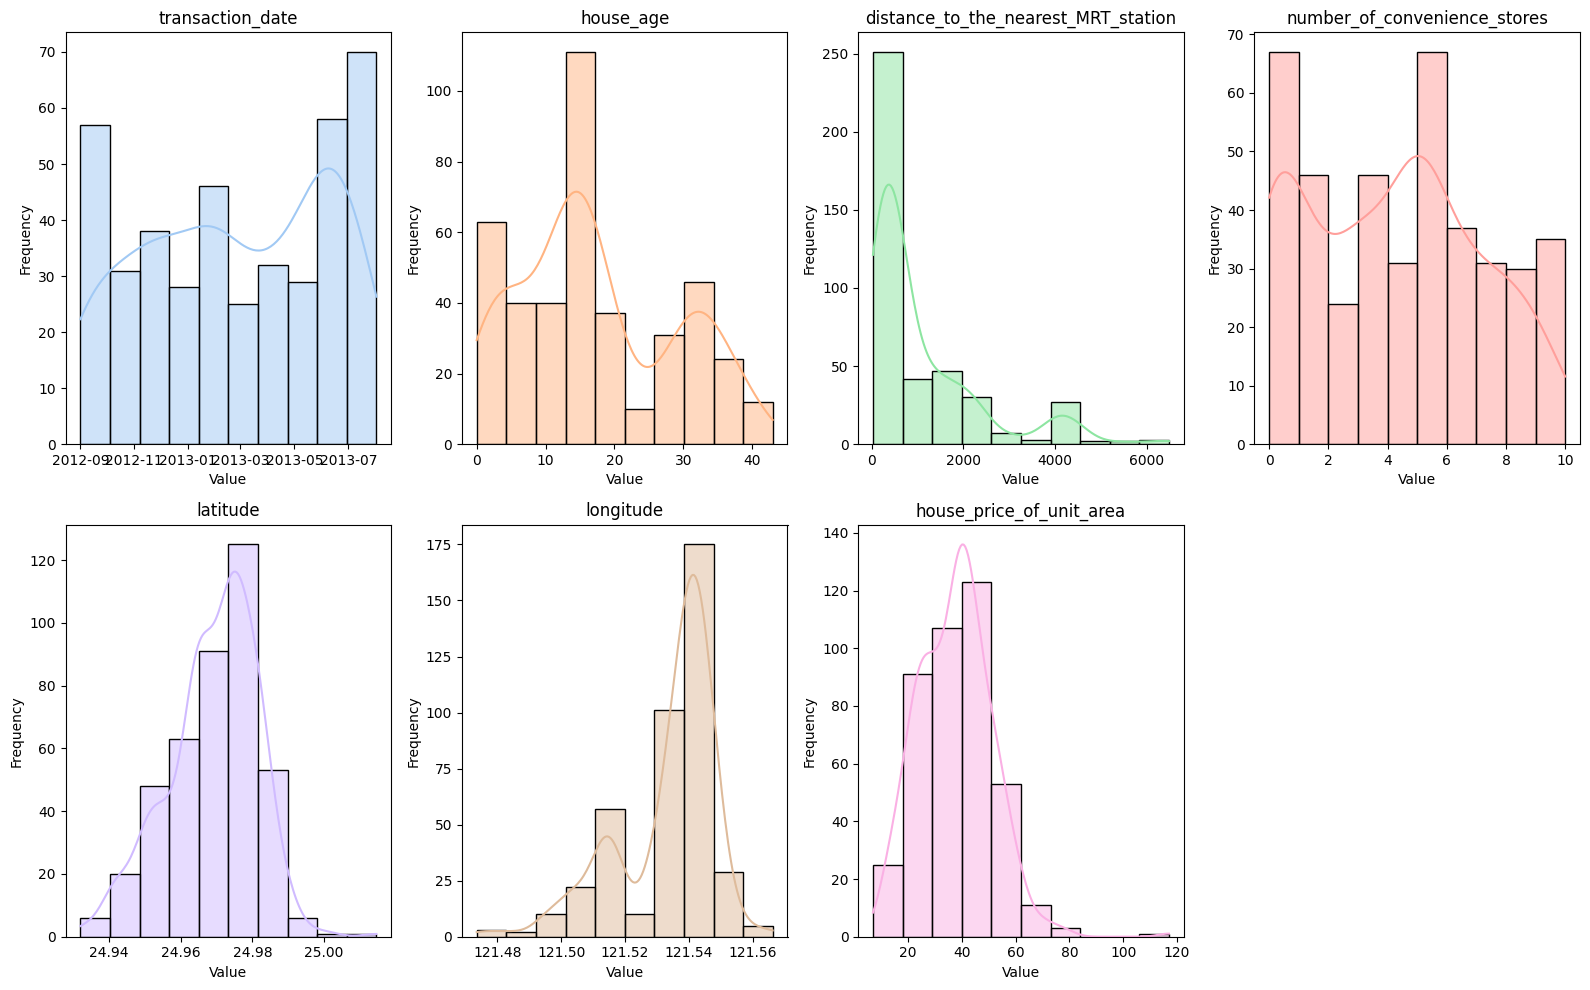

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


> Making box plots of the data is another way to visualize the distribution of the data. It provides a summary of the data distribution, including the median, quartiles, and potential outliers.

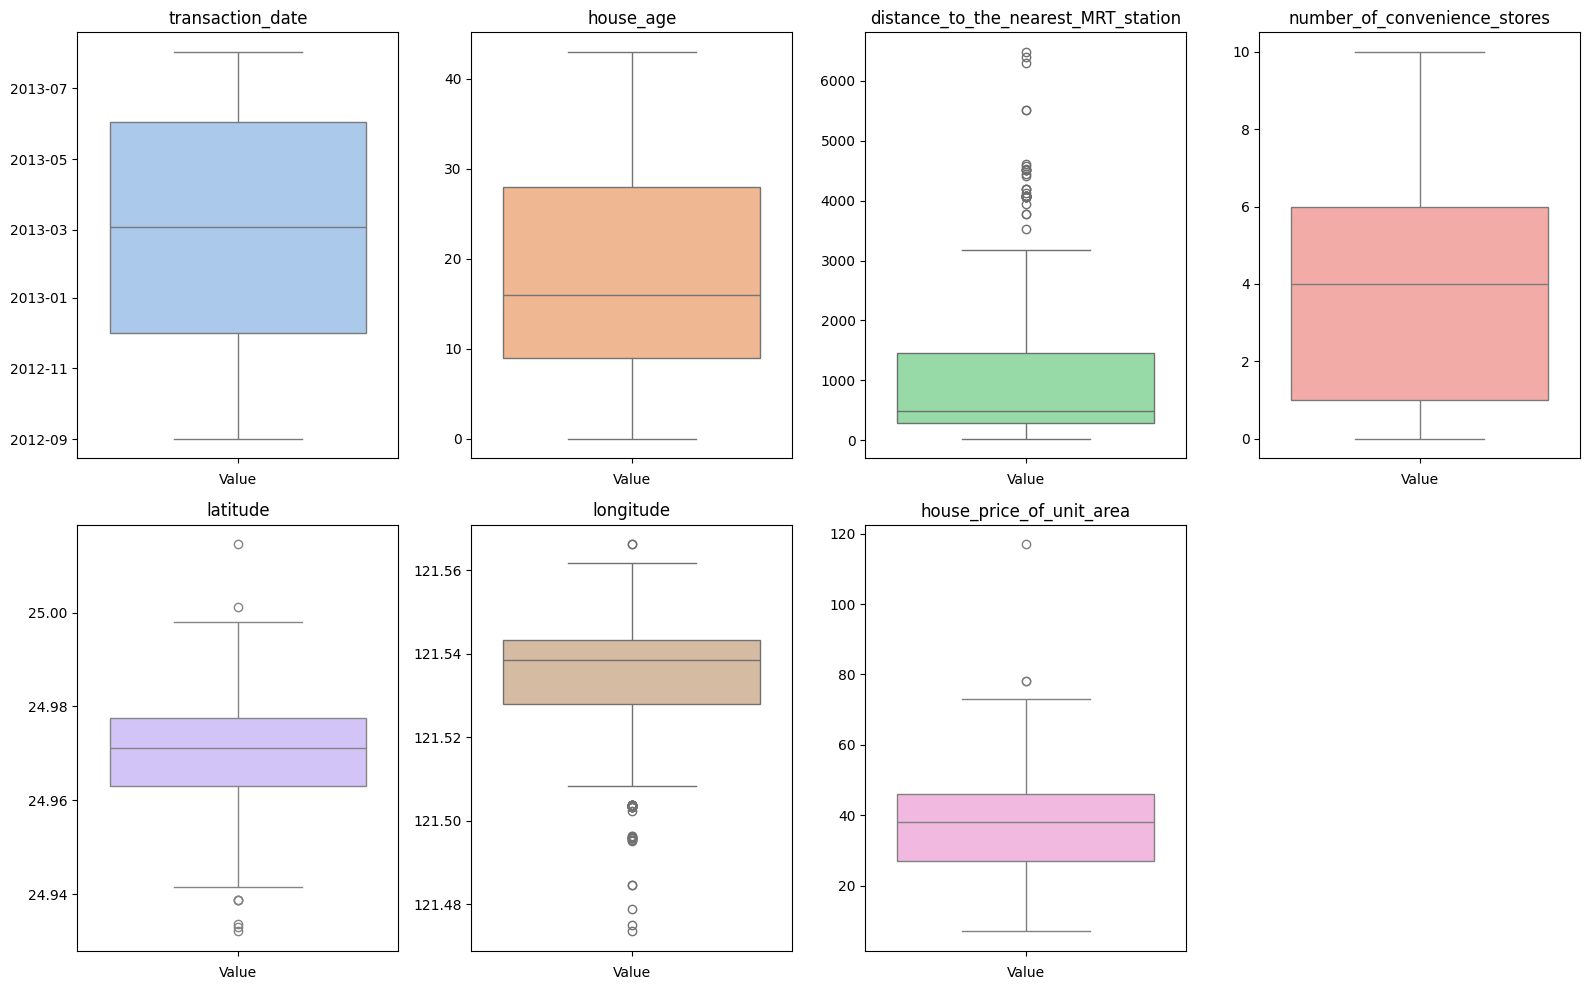

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a boxplot with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col], color=palette[i])
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
#calculating the unique values 
df.nunique()

transaction_date                        12
house_age                               44
distance_to_the_nearest_MRT_station    239
number_of_convenience_stores            11
latitude                               234
longitude                              232
house_price_of_unit_area                61
dtype: int64

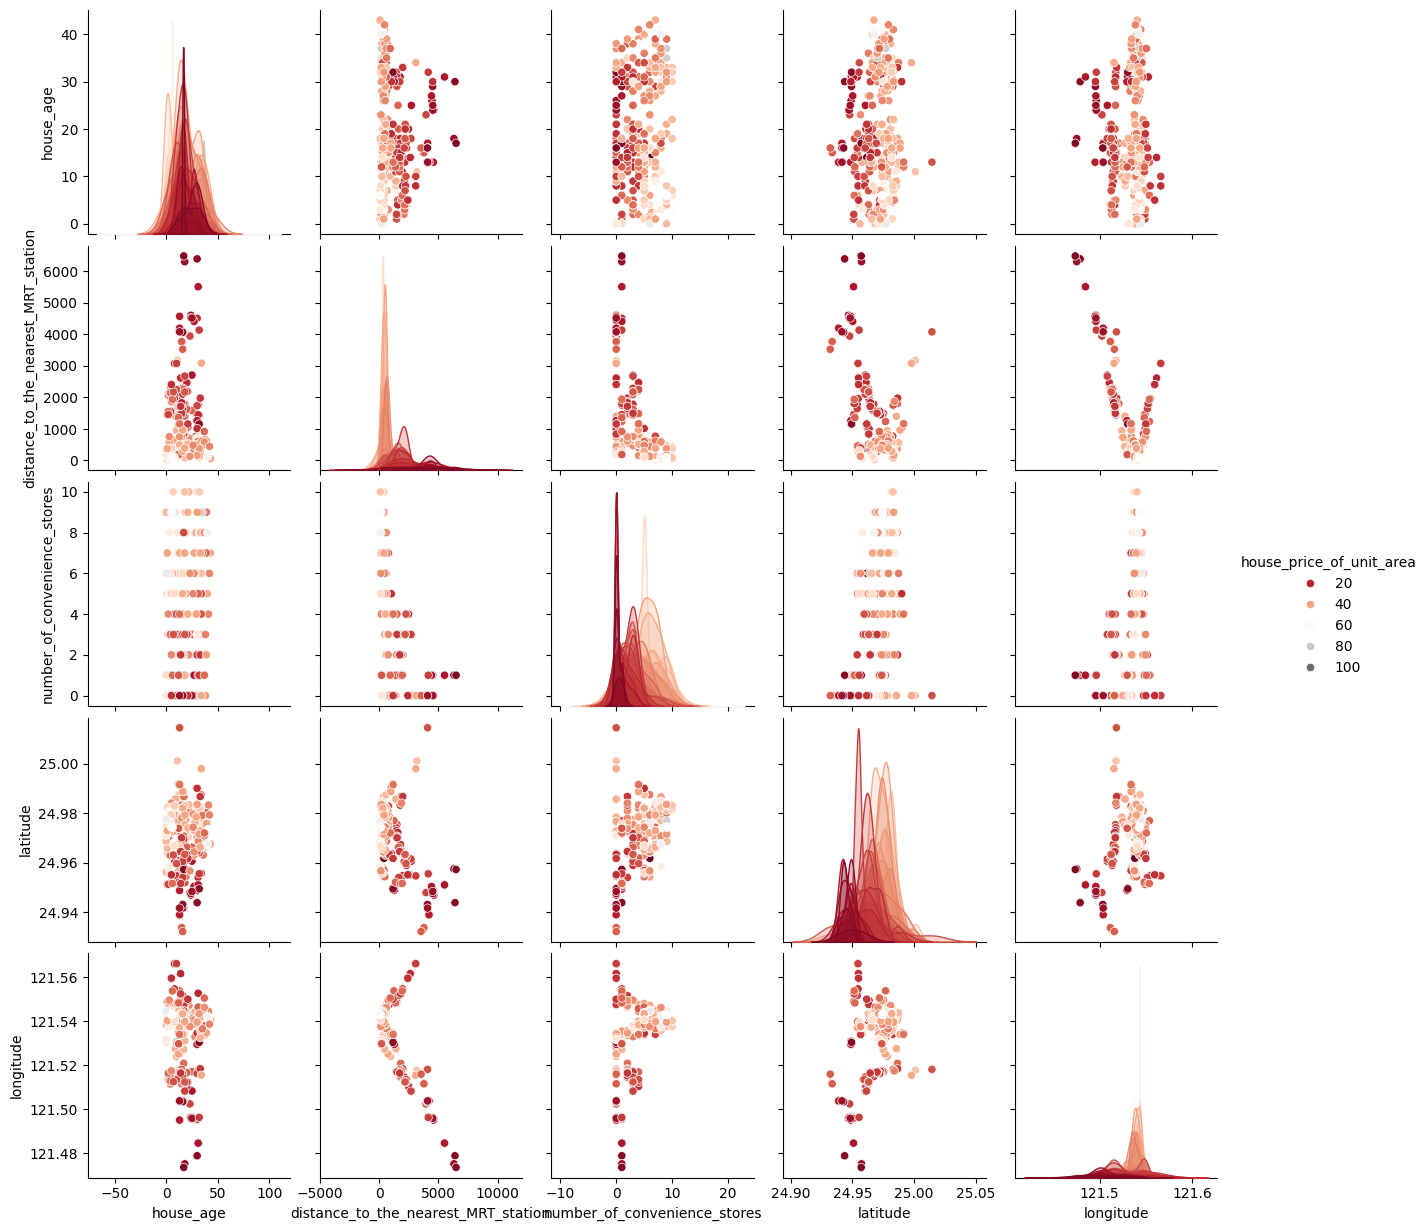

In [10]:
# making pairplot
sns.pairplot(df, hue='house_price_of_unit_area', palette='RdGy')

In [11]:
# Extract numerical features from the transaction_date
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day

# Drop the original transaction_date column
df = df.drop('transaction_date', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house_age                            414 non-null    int64  
 1   distance_to_the_nearest_MRT_station  414 non-null    int64  
 2   number_of_convenience_stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house_price_of_unit_area             414 non-null    int64  
 6   year                                 414 non-null    int32  
 7   month                                414 non-null    int32  
 8   day                                  414 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 24.4 KB


___
## <span style="color:blue;">Model Development</span>
___


## Polynomial Regression

In [12]:
# Splitting the dataset into dependent and independent variables
X = df.drop('house_price_of_unit_area', axis=1)
y = df['house_price_of_unit_area']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate the Polynomial Features transformer
poly = PolynomialFeatures(degree=2)

# Transform the features to include polynomial terms
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Instantiate the Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the transformed training data
lin_reg.fit(X_poly_train, y_train)

# Make predictions on the transformed testing data
y_pred = lin_reg.predict(X_poly_test)

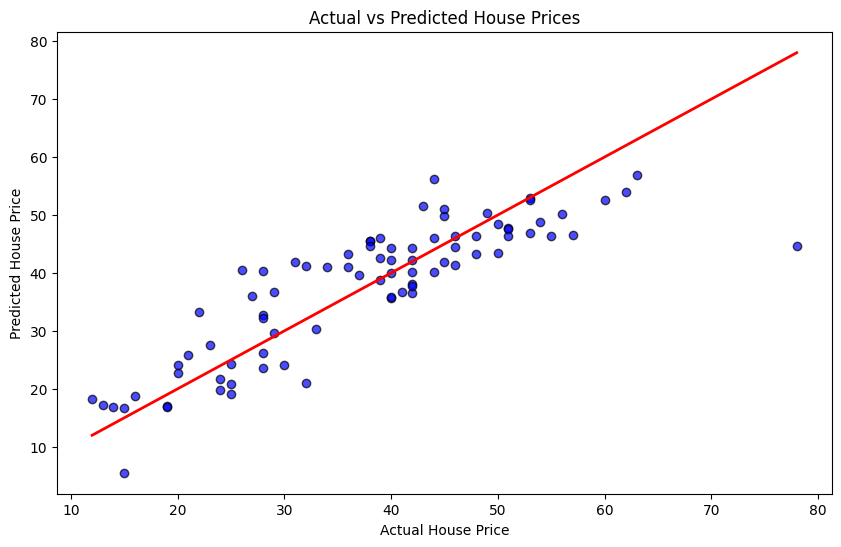

In [13]:
# Visualization of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line for perfect prediction
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>
___

## Model Performance Metrics
- **Objective:** Evaluate the performance of the model.
- **Techniques:** Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²) score.
- **Usage:** Helps in understanding how well the model is performing and making comparisons between models.

### Explanation of Metrics and Analysis

1. **R-squared (R²)**
   - **Information Provided:** Proportion of variance in the dependent variable that is predictable from the independent variable(s). It indicates how well the model explains the variability of the outcome.
   - **Interpretation:** Higher values indicate a better fit.

2. **Mean Squared Error (MSE)**
   - **Information Provided:** Average of the squared differences between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

3. **Mean Absolute Error (MAE)**
   - **Information Provided:** Average of absolute errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

4. **Mean Absolute Percentage Error (MAPE)**
   - **Information Provided:** Average of absolute percentage errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

5. **Residual Analysis**
   - **Information Provided:** Plot of residuals (differences between predicted and actual values) to assess if residuals are randomly distributed.
   - **Interpretation:** Randomly scattered residuals suggest a good fit; patterns indicate potential issues.

6. **Learning Curves**
   - **Information Provided:** Shows training and validation errors as a function of the number of training samples.
   - **Interpretation:** Helps diagnose if the model is overfitting or underfitting.

7. **Validation Curves**
   - **Information Provided:** Shows training and validation errors as a function of a hyperparameter (e.g., whether to fit intercept).
   - **Interpretation:** Helps determine the optimal value for the hyperparameter.

In [14]:
# Evaluating the model using the metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


R2 Score: 0.7328778727834475
Mean Absolute Error: 5.202203489929797
Mean Squared Error: 46.69933798501692
Root Mean Squared Error: 6.833691387896948


### Correlation Analysis
- **Objective:** Examine the strength and direction of the relationship between two or more continuous variables.
- **Techniques:** Pearson correlation coefficient, scatter plots.
- **Usage:** Helps in understanding the linear relationship between variables and identifying potential predictors.

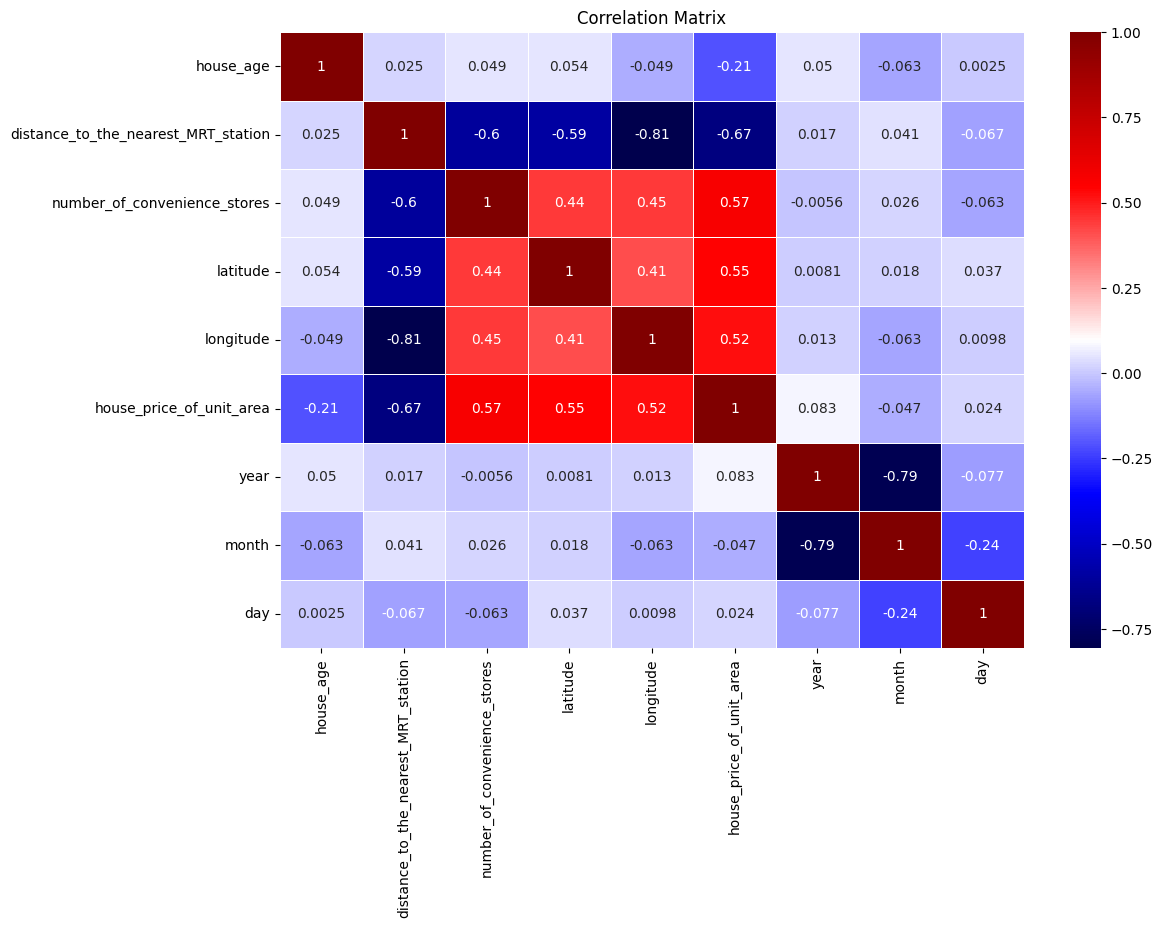

In [15]:
# correlation calculation
correlation = df.corr()
correlation['house_price_of_unit_area'].sort_values(ascending=False)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='seismic', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Residual Analysis
- **Objective:** Evaluate the model's assumptions and check for patterns in the residuals.
- **Techniques:** Residual plots, QQ plots.
- **Usage:** Helps in identifying any violations of the model's assumptions and improving the model.

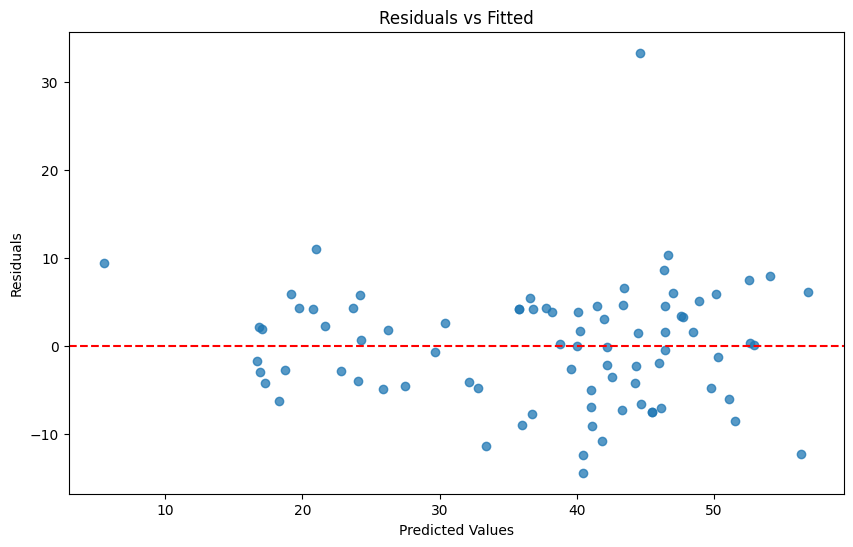

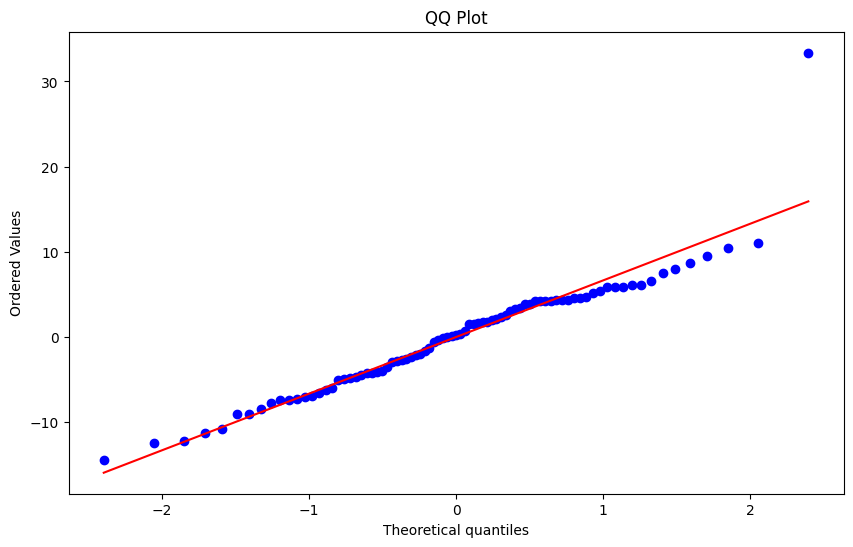

In [16]:
# Residual analysis
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# QQ plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

### Learning Curves
- **Objective:** Evaluate the performance of the model as a function of the training set size.
- **Techniques:** Plot training and validation error versus training set size.
- **Usage:** Helps in diagnosing whether the model is underfitting or overfitting.

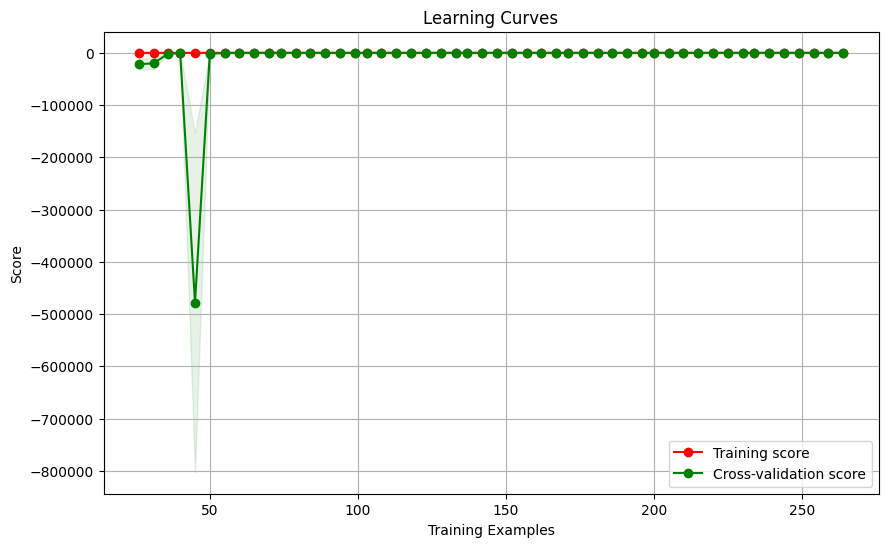

In [17]:
# Plotting Learning Curves
train_sizes, train_scores, validation_scores = learning_curve(lin_reg, X_poly_train, y_train, train_sizes=np.linspace(0.1, 1.0, 50), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(validation_scores, axis=1)
valid_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color="g", alpha=0.1)
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


### Validation Curves
- **Objective:** Evaluate the performance of the model as a function of a hyperparameter.
- **Techniques:** Plot training and validation error versus hyperparameter values.
- **Usage:** Helps in identifying the optimal value of the hyperparameter.

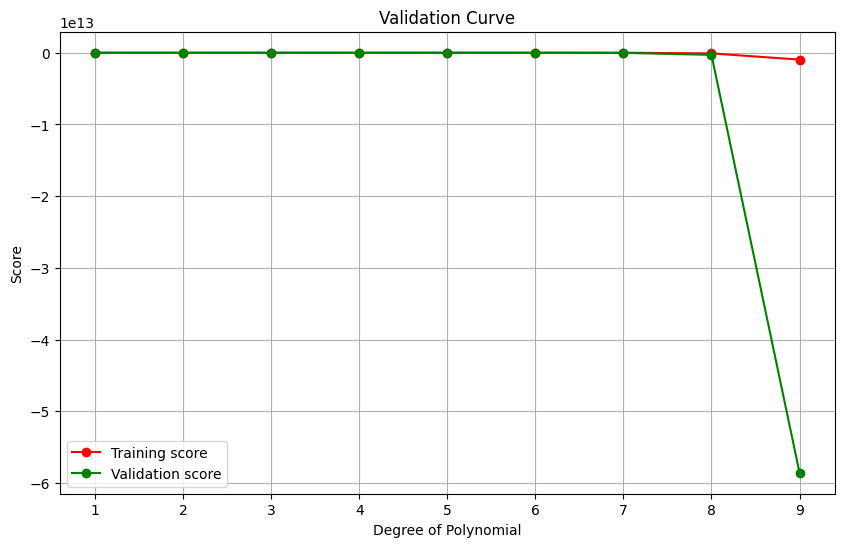

In [18]:
# Importing the required libraries for validation curve
from sklearn.model_selection import cross_val_score

# Define the range of degrees to evaluate
degrees = np.arange(1, 10)

# Initialize lists to store scores
train_scores = []
validation_scores = []

# Loop over the range of degrees
for degree in degrees:
    # Transform the features to include polynomial terms
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate the Linear Regression model
    lin_reg = LinearRegression()
    
    # Perform cross-validation and compute the mean scores
    train_score = np.mean(cross_val_score(lin_reg, X_poly_train, y_train, cv=5, scoring='r2'))
    validation_score = np.mean(cross_val_score(lin_reg, poly.transform(X_test), y_test, cv=5, scoring='r2'))
    
    # Append the scores to the lists
    train_scores.append(train_score)
    validation_scores.append(validation_score)

# Convert scores lists to numpy arrays
train_scores = np.array(train_scores)
validation_scores = np.array(validation_scores)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', color="r", label="Training score")
plt.plot(degrees, validation_scores, 'o-', color="g", label="Validation score")
plt.title('Validation Curve')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

In [19]:
# finding the best degree
best_degree = degrees[np.argmax(validation_scores)]
print('Best Degree:', best_degree)

Best Degree: 1


___
## <span style="color:blue;">SAMPLE TESTING</span>

___


In [20]:
# Creating new data for testing
new_data = pd.DataFrame({
    'house_age': [32, 19, 13],
    'distance_to_the_nearest_MRT_station': [84.87882, 306.5947, 561.9845],
    'number_of_convenience_stores': [10, 9, 5],
    'latitude': [24.98203, 24.98034, 24.98746],
    'longitude': [121.54348, 121.54391, 121.54391],
    'year': [2013, 2013, 2013],
    'month': [7, 5, 9],
    'day': [1, 8, 1]
})

# Transform the new data using the Polynomial Features transformer
# Fit the model to the transformed training data
lin_reg.fit(X_poly_train, y_train)

# Transform the new data using the Polynomial Features transformer
new_data_poly = poly.transform(new_data)

# Predict the house prices using the trained model
new_predictions = lin_reg.predict(new_data_poly)

# Display the predictions
new_predictions

array([ 177.94626595, -261.07117873,   93.18083686])

___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Findings

**Relationship Between Predictors and Performance:** The polynomial regression analysis revealed significant relationships between various predictors (house age, distance to MRT stations, number of convenience stores, latitude, longitude) and the house price per unit area. The model effectively captures the nonlinear relationships inherent in the data, illustrating how each factor contributes to the house price prediction.

### Model Performance

- **R-squared Score:** The Polynomial Regression model performed well, achieving an R-squared score of approximately 0.732. This indicates that 73.2% of the variance in house price per unit area can be explained by the predictor variables.
  
- **Evaluation Metrics:** Evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) were calculated to be low, specifically MAE = 5.20, MSE = 46.7, and RMSE = 6.83. These values suggest that the model predicts house prices with a reasonable degree of accuracy.

### Insights

- **Data Distribution:** The dataset exhibited varied distributions for key variables, with scatter plots and histograms confirming the spread and central tendencies. Robust data preprocessing ensured the reliability of the model by addressing outliers and ensuring feature scaling where necessary.
  
- **Model Robustness:** Cross-validation techniques, learning curves, and residual analyses demonstrated the model's robust performance across different subsets of data, indicating its reliability in predicting house prices based on the given predictors.

### Recommendations

- **Feature Engineering:** Further exploration into additional spatial features or socioeconomic indicators could potentially enhance the model's predictive power, especially in urban planning contexts.
  
- **Advanced Techniques:** Consider exploring ensemble methods or regularization techniques to further optimize model accuracy and generalize its applicability to diverse real estate markets.
  
- **Deployment:** Prepare the model for deployment in real estate valuation applications, ensuring scalability and adaptability to new property data effectively.

### Final Thoughts

The findings underscore the practical relevance of Polynomial Regression in predicting house prices based on location and amenities, offering valuable insights for real estate developers, investors, and urban planners.

Continued refinement through collaboration and data enrichment could yield enhanced predictive capabilities and broader application in real estate markets.

### Acknowledgements

- **Data Source:** Real Estate Price Prediction Dataset from Kaggle.
  
- **Libraries:** Utilized numpy, pandas, matplotlib, seaborn, and scikit-learn for data analysis, visualization, and modeling.

### Contact Information

For further inquiries or collaborations, please contact ahmadbinsadiq@gmail.com.

### References

- [Dataset: eal Estate Price Prediction Dataset from Kaggle.](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction)
